In [1]:
import pandas as pd
import numpy as np
import re
import string

# NLP
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# ML
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Download resources
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ameer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ameer\AppData\Roaming\nltk_data...


True

In [4]:
df = pd.read_csv(r"C:/Users/ameer/Downloads/ameeranalysis.csv")
df.head()


,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,keys,...,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",NaN,NaN,Cristina M,NaN,NaN,205 grams
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,Allow me to preface this with a little history...,One Simply Could Not Ask For More,NaN,NaN,Ricky,NaN,NaN,205 grams
2,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,4.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader,NaN,NaN,Tedd Gardiner,NaN,NaN,205 grams
3,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I bought one of the first Paperwhites and have...,Love / Hate relationship,NaN,NaN,Dougal,NaN,NaN,205 grams
4,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I have to say upfront - I don't like coroporat...,I LOVE IT,NaN,NaN,Miljan David Tanic,NaN,NaN,205 grams


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1597 entries, 0 to 1596
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1597 non-null   object 
 1   asins                 1597 non-null   object 
 2   brand                 1597 non-null   object 
 3   categories            1597 non-null   object 
 4   colors                774 non-null    object 
 5   dateAdded             1597 non-null   object 
 6   dateUpdated           1597 non-null   object 
 7   dimension             565 non-null    object 
 8   ean                   898 non-null    float64
 9   keys                  1597 non-null   object 
 10  manufacturer          965 non-null    object 
 11  manufacturerNumber    902 non-null    object 
 12  name                  1597 non-null   object 
 13  prices                1597 non-null   object 
 14  reviews.date          1217 non-null   object 
 15  reviews.doRecommend  

In [7]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)


In [9]:
# Make sure required columns exist
print(df.columns)

# Drop missing values safely
df = df[['reviews.text', 'reviews.rating']].dropna()

# Create sentiment label
df['sentiment'] = df['reviews.rating'].apply(lambda x: 1 if x >= 4 else 0)

# Apply preprocessing DIRECTLY on reviews.text
df['clean_review'] = df['reviews.text'].apply(clean_text)

df.head()


Index(['id', 'asins', 'brand', 'categories', 'colors', 'dateAdded',
       'dateUpdated', 'dimension', 'ean', 'keys', 'manufacturer',
       'manufacturerNumber', 'name', 'prices', 'reviews.date',
       'reviews.doRecommend', 'reviews.numHelpful', 'reviews.rating',
       'reviews.sourceURLs', 'reviews.text', 'reviews.title',
       'reviews.userCity', 'reviews.userProvince', 'reviews.username', 'sizes',
       'upc', 'weight'],
      dtype='object')


,reviews.text,reviews.rating,sentiment,clean_review
0,I initially had trouble deciding between the p...,5.0,1,initially trouble deciding paperwhite voyage r...
1,Allow me to preface this with a little history...,5.0,1,allow preface little history casual reader own...
2,I am enjoying it so far. Great for reading. Ha...,4.0,1,enjoying far great reading original fire since...
3,I bought one of the first Paperwhites and have...,5.0,1,bought one first paperwhites pleased constant ...
4,I have to say upfront - I don't like coroporat...,5.0,1,say upfront dont like coroporate hermetically ...


In [10]:
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})


In [13]:
# Step 1: Keep only required columns
df = df[['reviews.text', 'reviews.rating']].copy()

# Step 2: Convert rating to numeric (invalid → NaN)
df['reviews.rating'] = pd.to_numeric(df['reviews.rating'], errors='coerce')

# Step 3: Drop rows with missing text or rating
df.dropna(subset=['reviews.text', 'reviews.rating'], inplace=True)

# Step 4: Create sentiment label (binary)
df['sentiment'] = np.where(df['reviews.rating'] >= 4, 1, 0)

# Step 5: FORCE remove any NaN in sentiment (critical)
df = df.dropna(subset=['sentiment']).reset_index(drop=True)

# Step 6: Text cleaning
df['clean_review'] = df['reviews.text'].astype(str).apply(clean_text)

# Step 7: FINAL sanity checks
print("NaN in sentiment:", df['sentiment'].isna().sum())
print("Class distribution:\n", df['sentiment'].value_counts())


NaN in sentiment: 0
Class distribution:
 sentiment
1    977
0    200
Name: count, dtype: int64


In [14]:
X = df['clean_review']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


In [15]:
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [16]:
svm = LinearSVC(C=1.0)
svm.fit(X_train_tfidf, y_train)

svm_pred = svm.predict(X_test_tfidf)


In [17]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_tfidf, y_train)

lr_pred = lr.predict(X_test_tfidf)


In [18]:
nb = MultinomialNB(alpha=1.0)
nb.fit(X_train_tfidf, y_train)

nb_pred = nb.predict(X_test_tfidf)


In [19]:
def evaluate_model(name, y_true, y_pred):
    print(f"📌 {name} Performance")
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall   :", recall_score(y_true, y_pred))
    print("F1 Score :", f1_score(y_true, y_pred))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))


In [20]:
evaluate_model("Support Vector Machine", y_test, svm_pred)
evaluate_model("Logistic Regression", y_test, lr_pred)
evaluate_model("Multinomial Naive Bayes", y_test, nb_pred)


📌 Support Vector Machine Performance
Accuracy : 0.9194915254237288
Precision: 0.919431279620853
Recall   : 0.9897959183673469
F1 Score : 0.9533169533169533

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.57      0.71        40
           1       0.92      0.99      0.95       196

    accuracy                           0.92       236
   macro avg       0.92      0.78      0.83       236
weighted avg       0.92      0.92      0.91       236

📌 Logistic Regression Performance
Accuracy : 0.8559322033898306
Precision: 0.8552631578947368
Recall   : 0.9948979591836735
F1 Score : 0.9198113207547169

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.17      0.29        40
           1       0.86      0.99      0.92       196

    accuracy                           0.86       236
   macro avg       0.87      0.58      0.61       236
weighted avg       0.86      0.86      0.

In [21]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

models = {
    "SVM": LinearSVC(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": MultinomialNB()
}

for name, model in models.items():
    scores = []
    for train_idx, val_idx in skf.split(X_train_tfidf, y_train):
        model.fit(X_train_tfidf[train_idx], y_train.iloc[train_idx])
        preds = model.predict(X_train_tfidf[val_idx])
        scores.append(f1_score(y_train.iloc[val_idx], preds))
    print(f"{name} Mean F1-score: {np.mean(scores):.4f}")


SVM Mean F1-score: 0.9378
Logistic Regression Mean F1-score: 0.9276
Naive Bayes Mean F1-score: 0.9303


In [22]:
results = pd.DataFrame({
    "Model": ["SVM", "Logistic Regression", "Naive Bayes"],
    "Accuracy": [
        accuracy_score(y_test, svm_pred),
        accuracy_score(y_test, lr_pred),
        accuracy_score(y_test, nb_pred)
    ],
    "F1 Score": [
        f1_score(y_test, svm_pred),
        f1_score(y_test, lr_pred),
        f1_score(y_test, nb_pred)
    ]
})

results


,Model,Accuracy,F1 Score
0,SVM,0.919492,0.953317
1,Logistic Regression,0.855932,0.919811
2,Naive Bayes,0.860169,0.922353


In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc


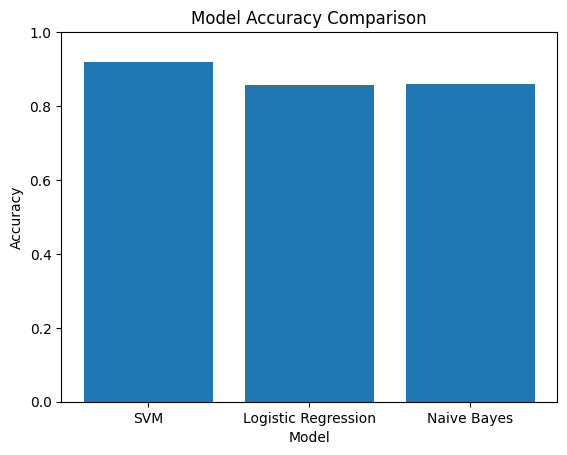

In [24]:
models = ['SVM', 'Logistic Regression', 'Naive Bayes']
accuracy = [
    accuracy_score(y_test, svm_pred),
    accuracy_score(y_test, lr_pred),
    accuracy_score(y_test, nb_pred)
]

plt.figure()
plt.bar(models, accuracy)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.ylim(0,1)
plt.show()


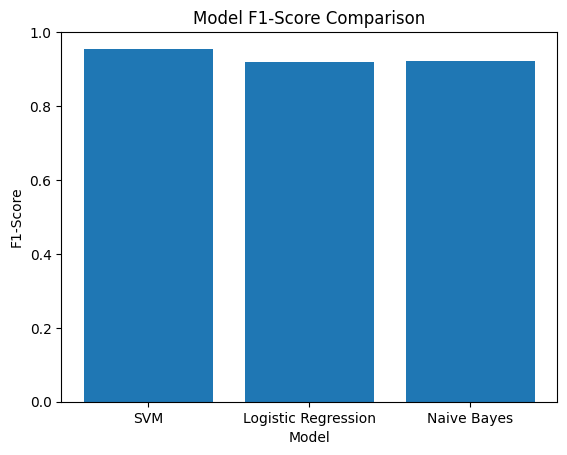

In [25]:
f1_scores = [
    f1_score(y_test, svm_pred),
    f1_score(y_test, lr_pred),
    f1_score(y_test, nb_pred)
]

plt.figure()
plt.bar(models, f1_scores)
plt.title("Model F1-Score Comparison")
plt.ylabel("F1-Score")
plt.xlabel("Model")
plt.ylim(0,1)
plt.show()


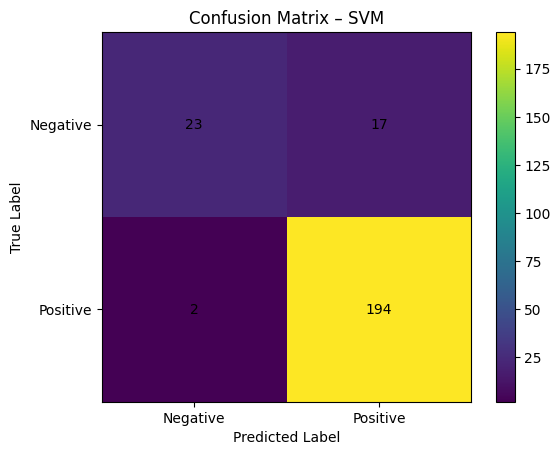

In [26]:
cm = confusion_matrix(y_test, svm_pred)

plt.figure()
plt.imshow(cm)
plt.title("Confusion Matrix – SVM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.colorbar()

plt.xticks([0,1], ['Negative', 'Positive'])
plt.yticks([0,1], ['Negative', 'Positive'])

for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.show()


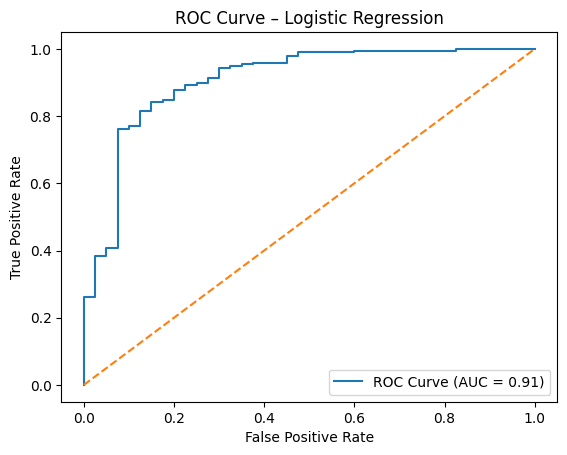

In [27]:
lr_probs = lr.predict_proba(X_test_tfidf)[:,1]

fpr, tpr, _ = roc_curve(y_test, lr_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Logistic Regression")
plt.legend()
plt.show()


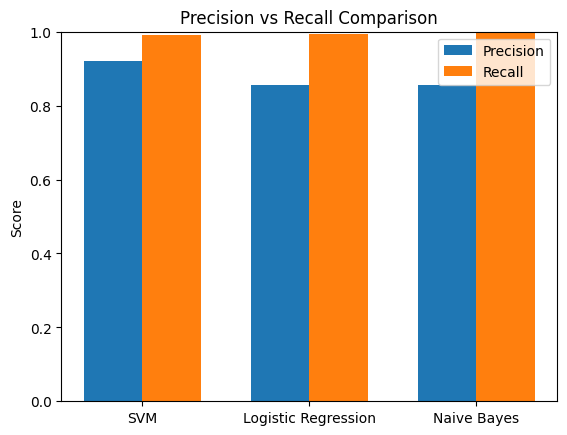

In [28]:

precision = [
    precision_score(y_test, svm_pred),
    precision_score(y_test, lr_pred),
    precision_score(y_test, nb_pred)
]

recall = [
    recall_score(y_test, svm_pred),
    recall_score(y_test, lr_pred),
    recall_score(y_test, nb_pred)
]

x = np.arange(len(models))
width = 0.35

plt.figure()
plt.bar(x - width/2, precision, width, label='Precision')
plt.bar(x + width/2, recall, width, label='Recall')

plt.xticks(x, models)
plt.ylabel("Score")
plt.title("Precision vs Recall Comparison")
plt.legend()
plt.ylim(0,1)
plt.show()


In [29]:
results_df = pd.DataFrame({
    "Model": models,
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1_scores
})

results_df


,Model,Accuracy,Precision,Recall,F1-Score
0,SVM,0.919492,0.919431,0.989796,0.953317
1,Logistic Regression,0.855932,0.855263,0.994898,0.919811
2,Naive Bayes,0.860169,0.855895,1.000000,0.922353


In [31]:
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)

    plt.figure()
    plt.imshow(cm)
    plt.title(f"Confusion Matrix – {model_name}")
    plt.colorbar()
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")

    for i in range(2):
        for j in range(2):
            plt.text(j, i, cm[i, j], ha="center", va="center")

    plt.show()


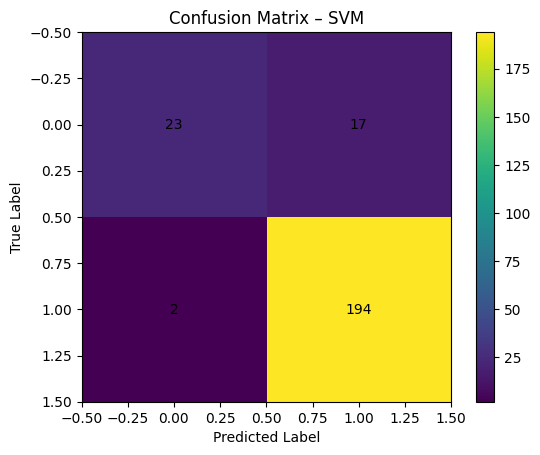

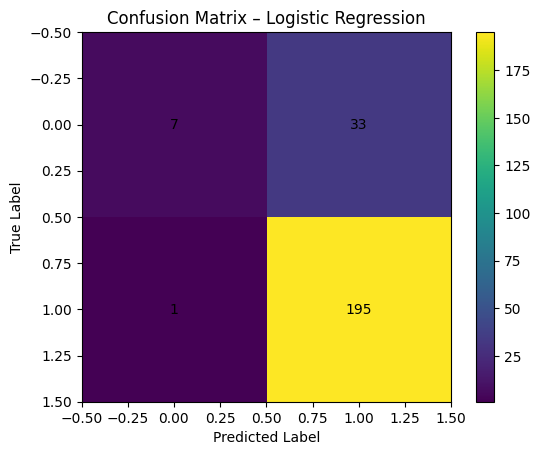

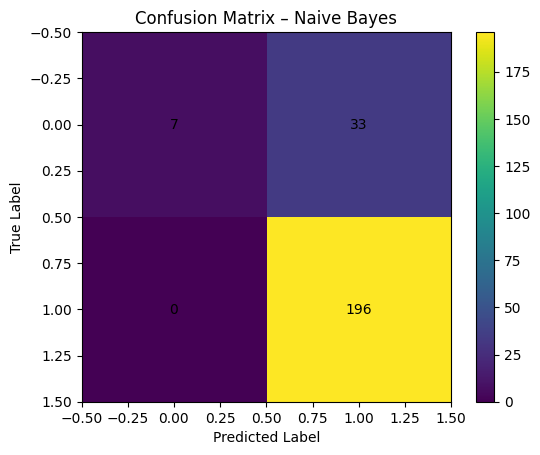

In [32]:
plot_confusion_matrix(y_test, svm_pred, "SVM")
plot_confusion_matrix(y_test, lr_pred, "Logistic Regression")
plot_confusion_matrix(y_test, nb_pred, "Naive Bayes")


In [33]:
def plot_roc(y_true, scores, model_name):
    fpr, tpr, _ = roc_curve(y_true, scores)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")
    plt.plot([0,1], [0,1], linestyle='--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve – {model_name}")
    plt.legend()
    plt.show()


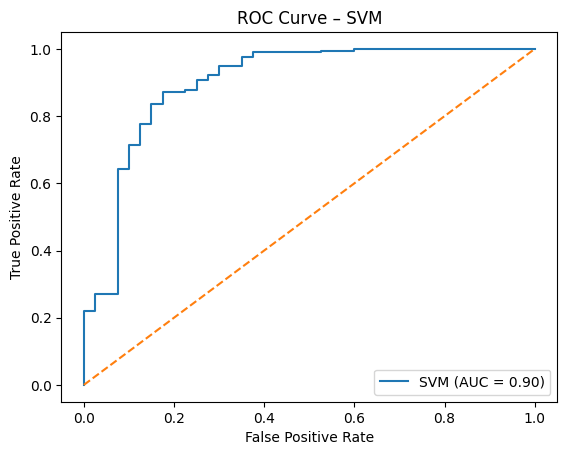

In [34]:
svm_scores = svm.decision_function(X_test_tfidf)
plot_roc(y_test, svm_scores, "SVM")


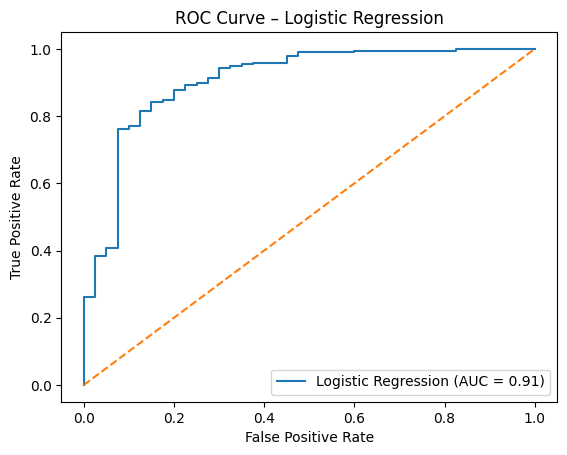

In [35]:
lr_scores = lr.predict_proba(X_test_tfidf)[:,1]
plot_roc(y_test, lr_scores, "Logistic Regression")


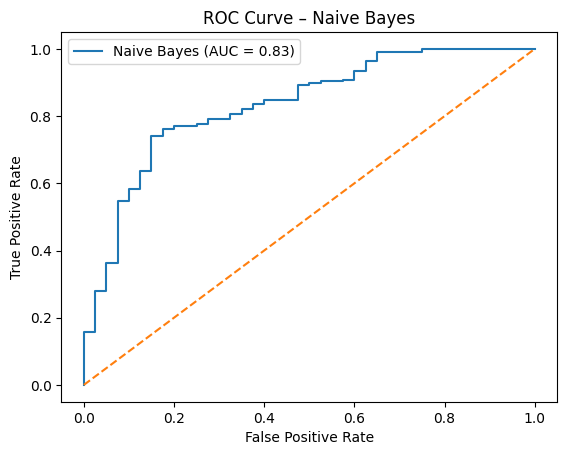

In [36]:
nb_scores = nb.predict_proba(X_test_tfidf)[:,1]
plot_roc(y_test, nb_scores, "Naive Bayes")


In [37]:
models = ['SVM', 'Logistic Regression', 'Naive Bayes']

accuracy = [
    accuracy_score(y_test, svm_pred),
    accuracy_score(y_test, lr_pred),
    accuracy_score(y_test, nb_pred)
]

precision = [
    precision_score(y_test, svm_pred),
    precision_score(y_test, lr_pred),
    precision_score(y_test, nb_pred)
]

recall = [
    recall_score(y_test, svm_pred),
    recall_score(y_test, lr_pred),
    recall_score(y_test, nb_pred)
]

f1 = [
    f1_score(y_test, svm_pred),
    f1_score(y_test, lr_pred),
    f1_score(y_test, nb_pred)
]


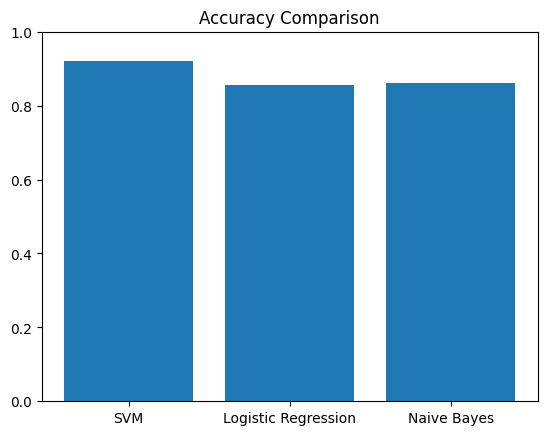

In [38]:
plt.figure()
plt.bar(models, accuracy)
plt.title("Accuracy Comparison")
plt.ylim(0,1)
plt.show()


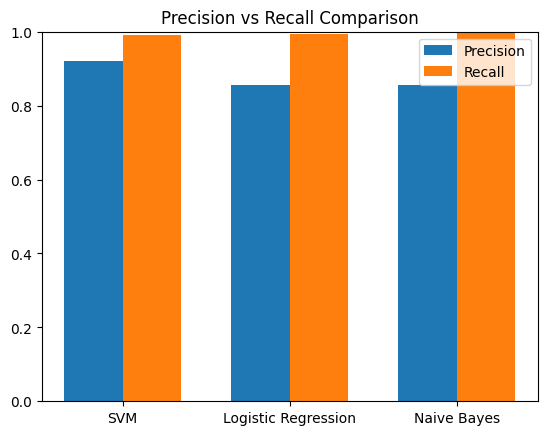

In [39]:
x = np.arange(len(models))
width = 0.35

plt.figure()
plt.bar(x - width/2, precision, width, label='Precision')
plt.bar(x + width/2, recall, width, label='Recall')

plt.xticks(x, models)
plt.title("Precision vs Recall Comparison")
plt.legend()
plt.ylim(0,1)
plt.show()


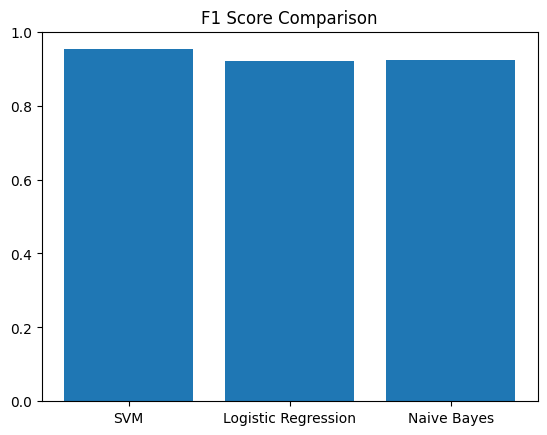

In [40]:
plt.figure()
plt.bar(models, f1)
plt.title("F1 Score Comparison")
plt.ylim(0,1)
plt.show()


In [41]:
results_df = pd.DataFrame({
    "Model": models,
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1
})

results_df


,Model,Accuracy,Precision,Recall,F1 Score
0,SVM,0.919492,0.919431,0.989796,0.953317
1,Logistic Regression,0.855932,0.855263,0.994898,0.919811
2,Naive Bayes,0.860169,0.855895,1.000000,0.922353
